In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

In [ ]:
data = pd.read_csv(url, names=columns, sep=',\s', engine='python')


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-606059910.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(url, names=columns, sep=',\s', engine='python')


In [ ]:
data.replace(' ?', pd.NA, inplace=True)
data.dropna(inplace=True)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}


In [ ]:
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le


In [ ]:
# Step 3: Split the dataset into features (X) and target (y)
X = data.drop('income', axis=1)  # Features
y = data['income']  # Target variable (income)



In [ ]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 5: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:

# Step 6: Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy of the Decision Tree model: {accuracy * 100:.2f}%")


Accuracy of the Decision Tree model: 81.32%


In [ ]:
# Optional: Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

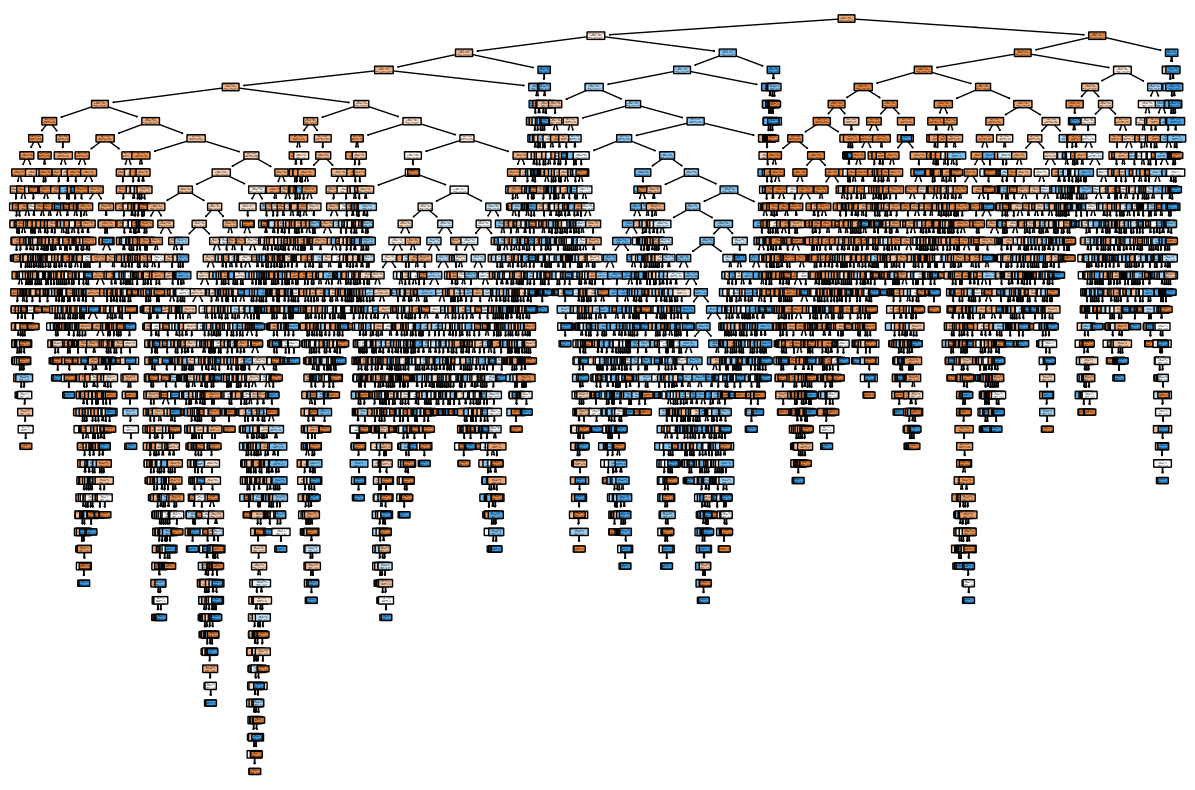

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['income'].classes_, rounded=True)
plt.show()